# Preparing Cyclistic's 2021 Data

In [1]:
import pandas as pd

In [2]:
pd.read_csv("/Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/202101-divvy-tripdata.csv").head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


## Data Cleaning

In [3]:
import glob

# Look for csv files in the input directory
path = '/Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/'
files = glob.glob(path + '/*.csv')

# create empty list to store dataframes
li = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')

Successfully created dataframe for /Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/202109-divvy-tripdata.csv with shape (756147, 13)
Successfully created dataframe for /Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/202104-divvy-tripdata.csv with shape (337230, 13)
Successfully created dataframe for /Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/202107-divvy-tripdata.csv with shape (822410, 13)
Successfully created dataframe for /Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/202111-divvy-tripdata.csv with shape (359978, 13)
Successfully created dataframe for /Users/Jerald/Documents/Documents – Jerald’s MacBook/Google Data analytics/Bike Sharing Case Study/202101-divvy-tripdata.csv with shape (96834, 13)
Successfully created dataframe for /Users/Jerald/Documents/Documents – Jerald’s M

In [4]:
# concatenate the list of dataframes into one
df = pd.concat(li, axis=0)
print(df.shape)
df.head()

(5595063, 13)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


In [5]:
# to find out more about the columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [6]:
# Drop Rows with Null Values
df.dropna(inplace= True)

In [7]:
# Dropping duplicates based on 'ride_id column'
df.drop_duplicates(subset='ride_id', keep= 'first', inplace= True)

In [8]:
df['started_at'].head()

59     2021-09-05 01:25:08
61     2021-09-05 13:33:41
153    2021-09-04 23:00:21
180    2021-09-14 16:25:16
182    2021-09-13 22:34:54
Name: started_at, dtype: object

In [9]:
#Create new column for date
df['date'] = pd.to_datetime(df['started_at']).dt.date
df['date'] = pd.to_datetime(df['date'])

In [10]:
#Convert from object to datetime 
from datetime import datetime
df['started_at'] =pd.to_datetime(df['started_at'])
df['ended_at'] =pd.to_datetime(df['ended_at'])

In [11]:
#create column for day of the week
df['day_of_week'] = df['date'].dt.day_name()

In [12]:
# Creating a column for month
df['month'] = df['date'].dt.month_name()

In [13]:
# Create a column for hour within the day
df['hour'] = df['started_at'].dt.hour

In [14]:
from datetime import timedelta

In [15]:
#to find out ride length
df['ride_length']=df['ended_at']-df['started_at']
df['ride_length'].head()

59    0 days 00:10:38
61    0 days 00:32:27
153   0 days 00:09:39
180   0 days 00:09:47
182   0 days 00:00:04
Name: ride_length, dtype: timedelta64[ns]

In [16]:
#to create a function to convert seconds to minutes since timedelta only has seconds
def convert_to_minutes(x):
    return x/60

#another function to convert seconds to hours
def convert_to_hours(x):
    return x/3600

In [17]:
#to convert ride length from days,hours,minutes,seconds to just seconds
#after that I append that to a list to insert into the df later

ride_length_in_seconds_list=[]

for ride in df['ride_length']:
    ride=timedelta.total_seconds(ride)
    ride_length_in_seconds_list.append(ride)
    
#check if successful
ride_length_in_seconds_list[:10]

[638.0, 1947.0, 579.0, 587.0, 4.0, 6.0, 7466.0, 416.0, 429.0, 278.0]

In [18]:
#inserting the list into the df for a ride length in just SECONDS
df['ride_length_in_seconds']=ride_length_in_seconds_list

#creating a column where ride length is converted to just MINUTES rounded off to 2 decimal places
df['ride_length_in_minutes']=df['ride_length_in_seconds'].apply(convert_to_minutes).round(2)

#creating a column where ride length is converted to just HOURS rounded off to 2 decimal places
df['ride_length_in_hours']=df['ride_length_in_seconds'].apply(convert_to_hours).round(2)


In [19]:
#check if everything looks ok
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,date,day_of_week,month,hour,ride_length,ride_length_in_seconds,ride_length_in_minutes,ride_length_in_hours
59,E92C804563F261EC,classic_bike,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,TA1306000011,Desplaines St & Kinzie St,TA1306000003,41.899930,-87.634430,...,-87.644448,casual,2021-09-05,Sunday,September,1,0 days 00:10:38,638.0,10.63,0.18
61,9ECA91210441E847,classic_bike,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,TA1309000006,Clark St & Leland Ave,TA1309000014,41.918084,-87.643749,...,-87.667429,casual,2021-09-05,Sunday,September,13,0 days 00:32:27,1947.0,32.45,0.54
153,3DAA144C4E85E3AA,classic_bike,2021-09-04 23:00:21,2021-09-04 23:10:00,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,...,-87.629521,casual,2021-09-04,Saturday,September,23,0 days 00:09:39,579.0,9.65,0.16
180,53B99FE9BD0D35F8,classic_bike,2021-09-14 16:25:16,2021-09-14 16:35:03,Kingsbury St & Kinzie St,KA1503000043,Orleans St & Elm St,TA1306000006,41.889177,-87.638506,...,-87.637715,casual,2021-09-14,Tuesday,September,16,0 days 00:09:47,587.0,9.78,0.16
182,2DB60C25C8CE3591,classic_bike,2021-09-13 22:34:54,2021-09-13 22:34:58,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,...,-87.623777,casual,2021-09-13,Monday,September,22,0 days 00:00:04,4.0,0.07,0.00


In [20]:
# Noticed that there may be rides shorter than 1 minute. 
# This could be due to accidentally starting a ride and ending it quickly.
# It could also be due to realising the bike is faulty
# Hence, I decided to remove rows where the rides were less than 1 minute long

df=df[df['ride_length_in_seconds']>60]
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,date,day_of_week,month,hour,ride_length,ride_length_in_seconds,ride_length_in_minutes,ride_length_in_hours
59,E92C804563F261EC,classic_bike,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,TA1306000011,Desplaines St & Kinzie St,TA1306000003,41.899930,-87.634430,...,-87.644448,casual,2021-09-05,Sunday,September,1,0 days 00:10:38,638.0,10.63,0.18
61,9ECA91210441E847,classic_bike,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,TA1309000006,Clark St & Leland Ave,TA1309000014,41.918084,-87.643749,...,-87.667429,casual,2021-09-05,Sunday,September,13,0 days 00:32:27,1947.0,32.45,0.54
153,3DAA144C4E85E3AA,classic_bike,2021-09-04 23:00:21,2021-09-04 23:10:00,Dearborn St & Monroe St,TA1305000006,Dearborn St & Monroe St,TA1305000006,41.881320,-87.629521,...,-87.629521,casual,2021-09-04,Saturday,September,23,0 days 00:09:39,579.0,9.65,0.16
180,53B99FE9BD0D35F8,classic_bike,2021-09-14 16:25:16,2021-09-14 16:35:03,Kingsbury St & Kinzie St,KA1503000043,Orleans St & Elm St,TA1306000006,41.889177,-87.638506,...,-87.637715,casual,2021-09-14,Tuesday,September,16,0 days 00:09:47,587.0,9.78,0.16
232,F79ECB90D812BB9F,classic_bike,2021-09-04 13:59:35,2021-09-04 16:04:01,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,...,-87.623777,casual,2021-09-04,Saturday,September,13,0 days 02:04:26,7466.0,124.43,2.07


## Questions to answer

### Cycling behaviours of Member vs Casual riders :
- What day of the week do they cycle most often (frequency of rides)
- Which month do they cycle most often (frequency of rides)
- What day of the week do they cycle the longest (ride length)
- Which month do they cycle the longest (ride length)
- What time of the day are rides more frequent
- Distribution of types of bikes used
- Which starting stations have high frequencies of rides

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### Frequency of rides within a week for member vs casual riders

In [22]:
# Within a week
sequence_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#create a table and also make days of the week in the correct sequence  
pd.crosstab(df['member_casual'], df['day_of_week']).reindex(columns=sequence_days)

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
member_casual,,,,,,,
casual,226587,212782,215971,222033,287162,463643,399510
member,341099,382449,391943,368032,360160,351093,305827


Text(0, 0.5, 'No. of Rides')

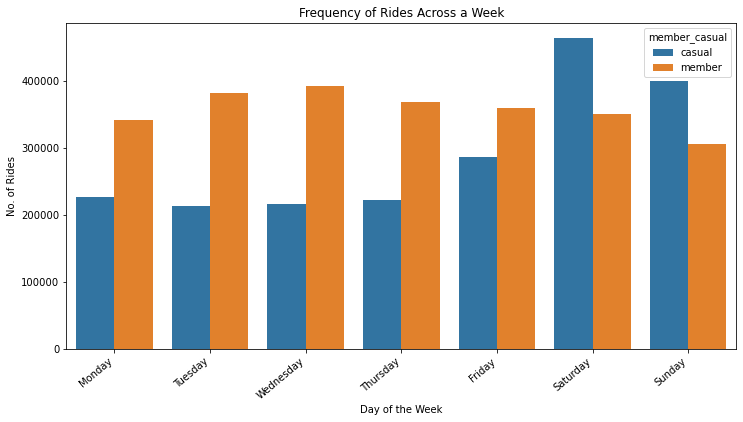

In [23]:
#barchart of frequency of rides across a week
plt.figure(figsize=(12,6))
freq_ride_week_barchart = sns.countplot(x= 'day_of_week',order= sequence_days, hue= 'member_casual',data= df)
freq_ride_week_barchart.set(title='Frequency of Rides Across a Week')
freq_ride_week_barchart.set_xticklabels(freq_ride_week_barchart.get_xticklabels(), rotation=40, ha="right")
freq_ride_week_barchart.set_xlabel("Day of the Week")
freq_ride_week_barchart.set_ylabel("No. of Rides")

#### -For casual riders, highest number of rides were recorded on Saturdays
#### -For member riders, highest number of rides were recorded on Wednesday and ridership seemed roughly the same across the week. 

### Frequency of rides across the year 

In [24]:
# Months over a year
sequence_months=['January','February','March','April','May','June','July','August','September','October','November','December']

#create a table and also make months in the correct sequence  
pd.crosstab(df['member_casual'], df['month']).reindex(columns=sequence_months)

month,January,February,March,April,May,June,July,August,September,October,November,December
member_casual,,,,,,,,,,,,
casual,14582,8506,75050,119349,214625,300735,365457,338095,290043,187302,69262,44682
member,68030,33787,128333,175248,230470,299694,317633,327900,323240,284080,182892,129296


Text(0, 0.5, 'No. of Rides')

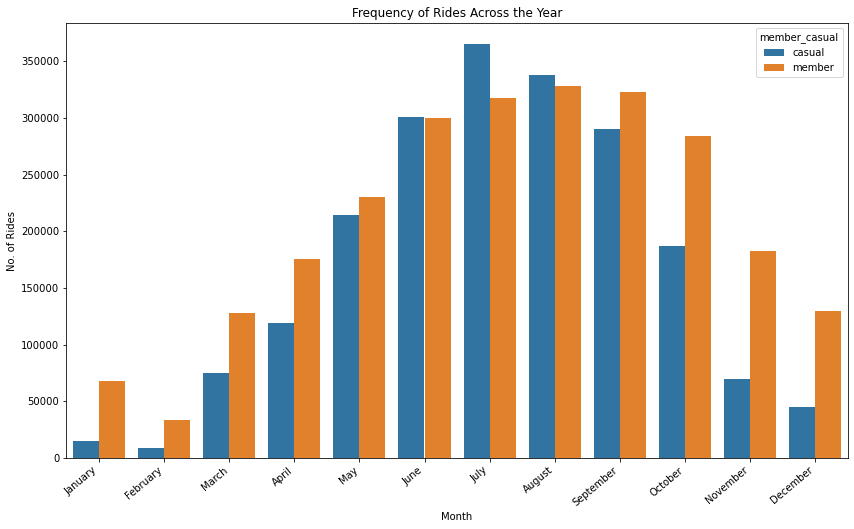

In [25]:
#barchart of frequency of rides across a year
plt.figure(figsize=(14,8))
freq_ride_month_barchart = sns.countplot(x= 'month',order= sequence_months, hue= 'member_casual',data= df)
freq_ride_month_barchart.set(title='Frequency of Rides Across the Year')
freq_ride_month_barchart.set_xticklabels(freq_ride_month_barchart.get_xticklabels(), rotation=40, ha="right")
freq_ride_month_barchart.set_xlabel("Month")
freq_ride_month_barchart.set_ylabel("No. of Rides")

#### -For casual riders, highest number of rides were recorded in July 
#### -For members, highest number of rides were recorded in August

### Ride Length Across the Week

Text(0, 0.5, 'Ride Length (minutes)')

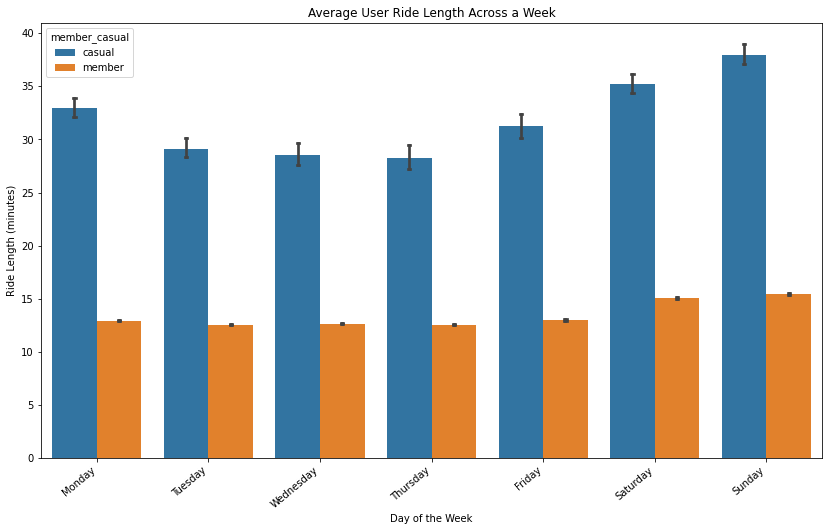

In [26]:
#barplot of each user's ride length across a week
plt.figure(figsize=(14,8))
ridelength_week_barplot = sns.barplot(x= 'day_of_week',y='ride_length_in_minutes',order= sequence_days, hue= 'member_casual',capsize= 0.02,data= df)
ridelength_week_barplot.set(title='Average User Ride Length Across a Week')
ridelength_week_barplot.set_xticklabels(ridelength_week_barplot.get_xticklabels(), rotation=40, ha="right")
ridelength_week_barplot.set_xlabel("Day of the Week")
ridelength_week_barplot.set_ylabel("Ride Length (minutes)")

#### -Casual riders' ride length is higher compared to member riders
#### -Casual riders cycle for a longer time on weekends compared to weekdays 
#### -Member riders cycle for a shorter duration consistently across the week

### Ride length across the year

Text(0, 0.5, 'Ride Length (minutes)')

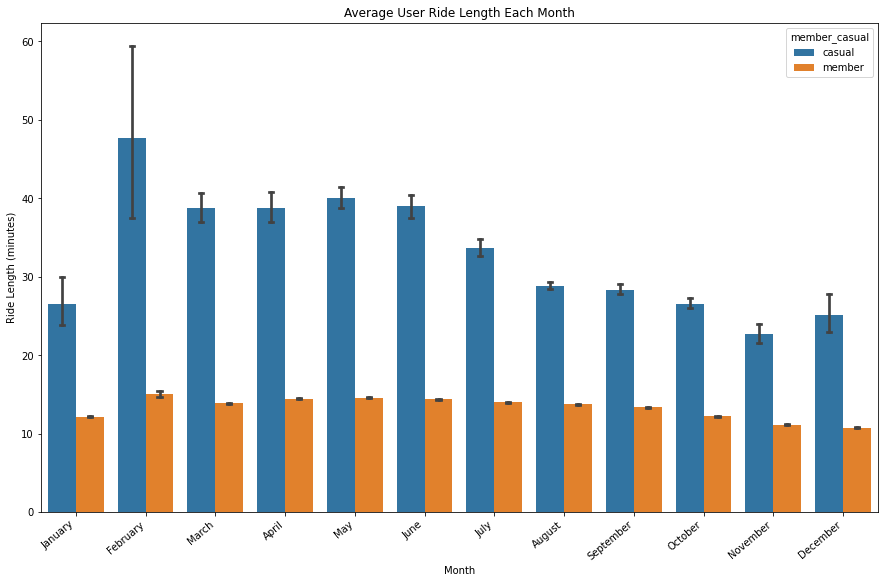

In [27]:
#barplot of each user's ride length per month across the year
plt.figure(figsize=(15,9))
ridelength_month_barplot = sns.barplot(x= 'month',y='ride_length_in_minutes',order= sequence_months, hue= 'member_casual',capsize= 0.06,data= df)
ridelength_month_barplot.set(title='Average User Ride Length Each Month')
ridelength_month_barplot.set_xticklabels(ridelength_month_barplot.get_xticklabels(), rotation=40, ha="right")
ridelength_month_barplot.set_xlabel("Month")
ridelength_month_barplot.set_ylabel("Ride Length (minutes)")

### Ride Frequency Within the Day

In [28]:
# create table of frequency of rides per hour
pd.crosstab(df['member_casual'], df['hour'])

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,41885,30382,19402,10132,6627,8727,19231,35729,49251,60269,...,144671,151761,166216,194020,174479,133675,96986,81941,75691,58189
member,24840,16069,8815,5011,5902,25260,70699,128685,147569,106601,...,139646,162434,213334,269437,224909,158660,104567,76000,57628,39263


[Text(0.5, 1.0, 'Ride Frequency within a Day')]

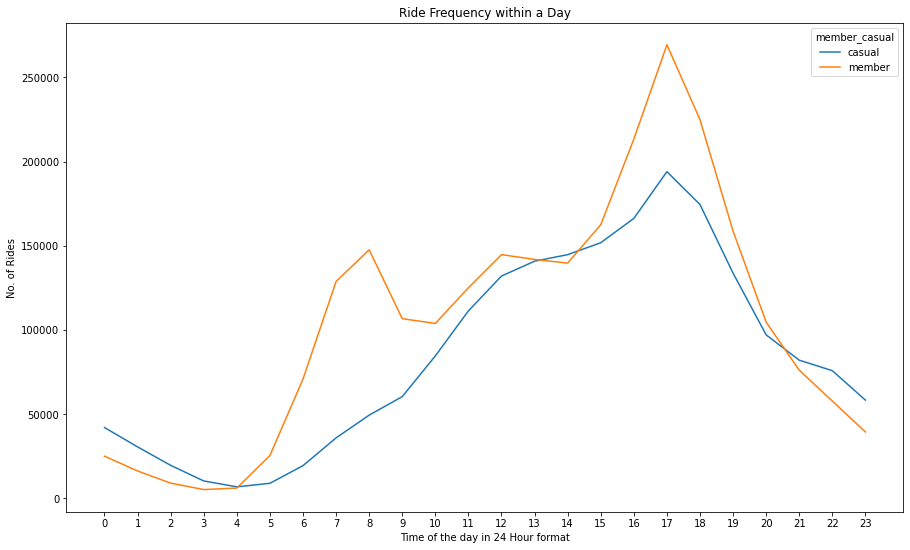

In [29]:
# create line graph
plt.figure(figsize=(15,9))
day_frequency=df.groupby(["member_casual","hour"])["ride_length"].count()

day_freq_lineplot=sns.lineplot(x="hour",y=day_frequency, hue="member_casual",
             data=day_frequency)
day_freq_lineplot.set_xlabel("Time of the day in 24 Hour format")
day_freq_lineplot.set_ylabel("No. of Rides")
day_freq_lineplot.set_xticks(range(24))
day_freq_lineplot.set(title='Ride Frequency within a Day')

#### Both casual and member riders tend to ride in the evening, most frequently at 5pm. 

### Bike Preferrences Among Casual and Member Riders

In [30]:
# Bike preferences
pd.crosstab(df['member_casual'], df['rideable_type'])

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1248280,310075,469333
member,1951549,1,549053


[Text(0.5, 1.0, 'Bike Preference Among Riders')]

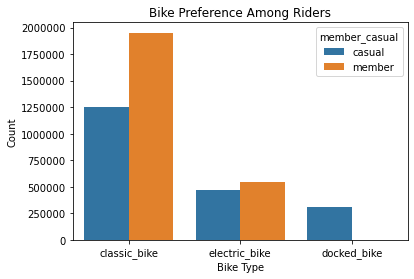

In [31]:
bike_pref_barchart=sns.countplot(x= 'rideable_type', hue= 'member_casual', data=df,)
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
bike_pref_barchart.set(title='Bike Preference Among Riders')

#### -Both casual and member riders prefer classic bikes the most and docked bikes the least

### Top 10 Start Station Names by Casual Riders

In [32]:
#Count frequency of rides according to start stations, sorted in descending order
start_station = df.groupby(["member_casual","start_station_name"])["ride_length"].count().sort_values(ascending = False)

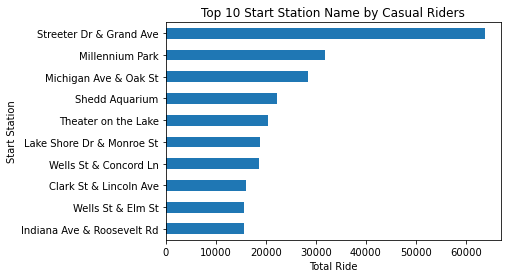

In [39]:
#Create a horizontal bar plot for casual riders
ax = start_station.loc["casual"][:10].plot.barh()
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride',ylabel='Start Station', title = "Top 10 Start Station Name by Casual Riders")


plt.show()

### Top 10 End Station Names by Casual Riders

In [34]:
#Count frequency of rides according to end stations, sorted in descending order
end_station = df.groupby(["member_casual","end_station_name"])["ride_length"].count().sort_values(ascending = False)

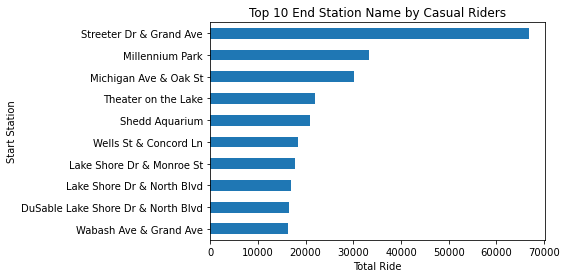

In [40]:
#Horizontal bar plot of end stations by casual riders
ax = end_station.loc["casual"][:10].plot.barh()
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride',ylabel='Start Station', title = "Top 10 End Station Name by Casual Riders")


plt.show()

### Top 10 Start Station Names by Member Riders

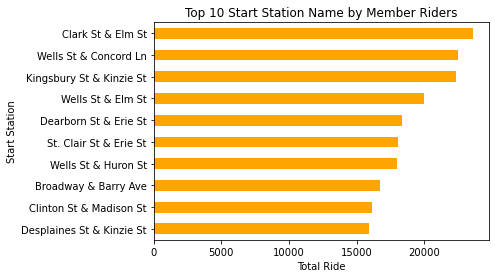

In [41]:
#Create horizontal bar plot for member riders
ax = start_station.loc["member"][:10].plot.barh(color= 'orange')
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride', ylabel='Start Station',title = "Top 10 Start Station Name by Member Riders")


plt.show()

### Top 10 End Station Names by Member Riders

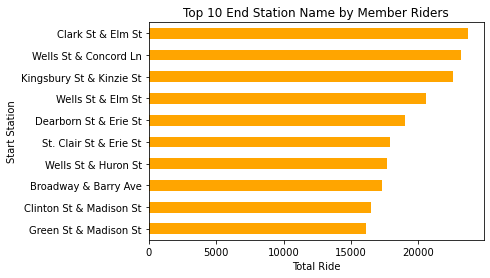

In [42]:
#Horizontal bar plot of end stations by member riders

ax = end_station.loc["member"][:10].plot.barh(color='orange')
ax.invert_yaxis()
ax.set(xlabel = 'Total Ride',ylabel='Start Station', title = "Top 10 End Station Name by Member Riders")


plt.show()

## Conclusion

- Casual riders cycle more often on weekends than weekdays 
- Casual riders cycle for a longer time compared to members 
- Ridership is highest during the summer period from June to September
- Ridership is highest in the evening at 5pm
- Both casual riders and members prefer docked bikes
- For casual riders, most rides start at Streeter Dr & Grand Ave


## Recommendations

1. Create a weekend pass that allows casual riders to ride longer on weekends for a cheaper rate
2. Advertising campaigns should be run slightly before the start of the summer months
3. Can also consider a seasonal pass that allows casual riders to enjoy discounted prices from June to September
4. Ensure that there are sufficient bikes deployed at Streeter Dr & Grand Ave